#Drive the price

Este código se encarga de trabajar con un dataset de precios de automóviles. Primero, carga los datos y convierte las variables categóricas en variables numéricas usando "dummy variables". Luego, toma la columna de precios y la convierte en una variable binaria, donde asigna 1 si el precio es mayor que la mediana del dataset y 0 si es menor o igual. Después, elimina la columna original de precios y finalmente muestra las primeras filas del DataFrame con los cambios aplicados.

In [13]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("car_price_dataset.csv")
df = pd.get_dummies(df, drop_first=True)

# Definir la variable objetivo y binarizar el precio (mayor o menor al umbral)
threshold = df['Price'].median()
df['price_bin'] = (df['Price'] > threshold).astype(int)

# Mostrar la mediana del precio
print("Mediana del precio:", df['Price'].median())

# Eliminar la variable 'Price' ya que ahora usamos 'price_bin'
df = df.drop(columns=['Price'])

df.head()


Mediana del precio: 8858.5


,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic,price_bin
0,2020,4.2,289944,3,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2012,2.0,5356,2,3,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,1
2,2020,4.2,231440,4,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,2023,2.0,160971,2,1,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,1
4,2003,2.6,286618,3,3,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,0


Se carga el dataset y se separan las variables predictoras (`X`) y la variable objetivo (`y`). Se imprime la proporción de clases en los datos originales para verificar el balance de las clases. Luego, se utiliza `train_test_split` para dividir los datos en un 80% para entrenamiento y un 20% para prueba, manteniendo el balance de clases en ambos conjuntos mediante el parámetro `stratify=y`. Finalmente, se imprime la proporción de clases en los conjuntos de entrenamiento y prueba para asegurarse de que se conserva la distribución original de las clases.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price_bin'])
y = df['price_bin']

print("Proporción de clases en los datos originales:")
print(y.value_counts(normalize=True))

# Dividir los datos en entrenamiento y prueba con balance de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Imprimir las proporciones de las clases para los tres conjuntos

print("\nProporción de clases en los datos de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporción de clases en los datos de prueba:")
print(y_test.value_counts(normalize=True))

Proporción de clases en los datos originales:
price_bin
0    0.5
1    0.5
Name: proportion, dtype: float64

Proporción de clases en los datos de entrenamiento:
price_bin
0    0.5
1    0.5
Name: proportion, dtype: float64

Proporción de clases en los datos de prueba:
price_bin
0    0.5
1    0.5
Name: proportion, dtype: float64


Se seleccionan algunas columnas específicas del conjunto de entrenamiento para construir el modelo, que incluyen características como el año, tamaño del motor, kilometraje y tipo de combustible. Luego, se definen los parámetros para un proceso de búsqueda en cuadrícula (`GridSearchCV`) para encontrar la mejor configuración del modelo de regresión logística. Los parámetros incluyen el tipo de penalización (`penalty`), el solucionador (`solver`) y el número máximo de iteraciones (`max_iter`).

Se utiliza `GridSearchCV` con validación cruzada de 10 pliegues para evaluar diferentes combinaciones de estos parámetros y determinar cuál tiene el mejor rendimiento en términos de exactitud (`accuracy`). Una vez ajustado el modelo, se imprimen los resultados: el puntaje medio de la validación cruzada, los mejores parámetros encontrados y el estimador óptimo para el modelo.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Seleccionar solo algunas columnas para el modelo
selected_columns = ['Year', 'Engine_Size', 'Mileage', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid']
Xn = X_train[selected_columns].values
yn = y_train.values

# Definir parámetros para GridSearch
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # 'none' en minúsculas
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],  # Eliminamos 'newton-chilesky'
     'max_iter': [1000, 2000]}
]

# GridSearchCV con validación cruzada de 10 folds
grid_search = GridSearchCV(LogisticRegression(random_state=0, class_weight="balanced"),
                           param_grid=param_grid, scoring='accuracy', cv=10)

grid_search.fit(Xn, yn)  # Usamos las características corregidas

# Mostrar resultados
print("Mean cross-validated score of the best_estimator:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/opt

Mean cross-validated score of the best_estimator: 0.92425
Best parameters: {'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best estimator: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0,
                   solver='newton-cg')


Se utiliza el modelo de regresión logística con los mejores parámetros encontrados en el paso anterior (`class_weight='balanced'`, `max_iter=1000`, `random_state=0`, `solver='newton-cg'`). El modelo se entrena con el conjunto de datos de entrenamiento, y luego se realizan predicciones en el conjunto de prueba utilizando las mismas columnas seleccionadas.

Para evaluar el rendimiento del modelo, se calcula la matriz de confusión, la exactitud (accuracy), la sensibilidad (recall) y la especificidad. La matriz de confusión muestra los valores de Verdaderos Negativos (TN) y Falsos Positivos (FP), que se usan para calcular la especificidad. Finalmente, se imprimen la matriz de confusión y las métricas de evaluación obtenidas.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Modelo de Regresión Logística
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0,
                           solver='newton-cg')

# Entrenar el modelo
model.fit(Xn, yn)

X_test_new = X_test[selected_columns].values

# Predicciones
y_pred = model.predict(X_test_new)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
TN, FP, _, _ = cm.ravel()

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)

# Imprimir resultados
print("\nMatriz de confusión:\n", cm)
print("\nExactitud (Accuracy):", accuracy)
print("Sensibilidad (Recall):", recall)
print("Especificidad:", specificity)

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(



Matriz de confusión:
 [[918  82]
 [ 89 911]]

Exactitud (Accuracy): 0.9145
Sensibilidad (Recall): 0.911
Especificidad: 0.918


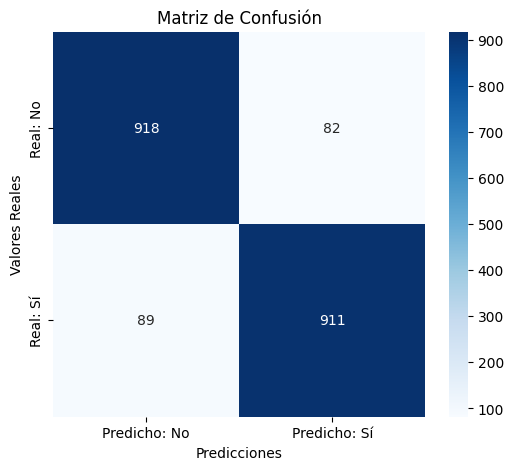

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicho: No", "Predicho: Sí"], yticklabels=["Real: No", "Real: Sí"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


Se entrena un modelo de regresión logística utilizando todo el conjunto de entrenamiento y se generan las probabilidades de clase para el conjunto de prueba. Luego, se evalúa el modelo con tres umbrales diferentes: 0.5, 0.7 y 0.3. Para cada umbral, las probabilidades se convierten en predicciones binarias (0 o 1) y se calcula la matriz de confusión, que se visualiza mediante un gráfico.

Además, se calculan varias métricas como la exactitud, la sensibilidad (recall) y la especificidad, lo que permite evaluar el rendimiento del modelo para cada umbral. Finalmente, se muestran los resultados de las métricas y la matriz de confusión para cada umbral, lo que permite observar cómo cambia el desempeño del modelo al ajustar el umbral de decisión.

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


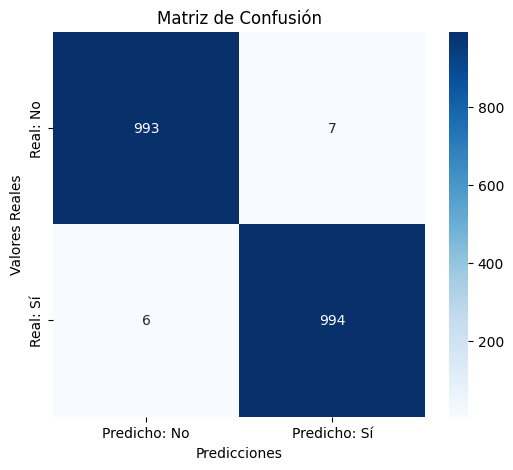


Resultados para umbral 0.5:
Matriz de confusión:
 [[993   7]
 [  6 994]]
Exactitud (Accuracy): 0.9935
Sensibilidad (Recall): 0.994
Especificidad: 0.993


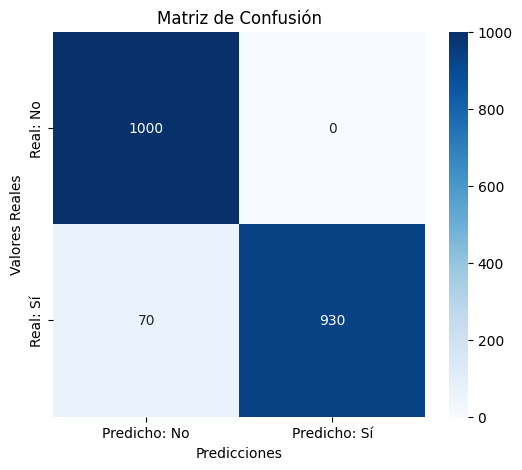


Resultados para umbral 0.7:
Matriz de confusión:
 [[1000    0]
 [  70  930]]
Exactitud (Accuracy): 0.965
Sensibilidad (Recall): 0.93
Especificidad: 1.0


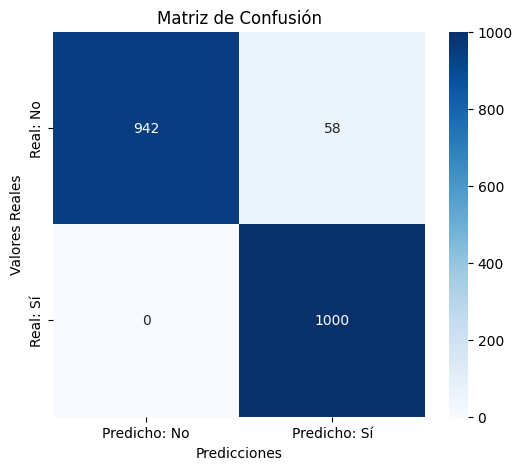


Resultados para umbral 0.3:
Matriz de confusión:
 [[ 942   58]
 [   0 1000]]
Exactitud (Accuracy): 0.971
Sensibilidad (Recall): 1.0
Especificidad: 0.942


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import numpy as np

# Entrenar el modelo de regresión logística con todo el conjunto de entrenamiento
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0, solver='newton-cg')
model.fit(X_train, y_train)

# Generar probabilidades de clase para el conjunto de prueba
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Evaluar el modelo para tres umbrales diferentes
thresholds = [0.5, 0.7, 0.3]
for threshold in thresholds:
    # Convertir probabilidades a clases usando el umbral
    y_pred = (y_probs >= threshold).astype(int)

    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicho: No", "Predicho: Sí"], yticklabels=["Real: No", "Real: Sí"])
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.show()

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Calcular especificidad
    TN, FP, _, _ = cm.ravel()
    specificity = TN / (TN + FP)

    # Mostrar los resultados para el umbral actual
    print(f"\nResultados para umbral {threshold}:")
    print("Matriz de confusión:\n", cm)
    print(f"Exactitud (Accuracy): {accuracy}")
    print(f"Sensibilidad (Recall): {recall}")
    print(f"Especificidad: {specificity}")


Se calcula la curva ROC (Receiver Operating Characteristic) utilizando las probabilidades predichas para la clase positiva y las etiquetas reales del conjunto de prueba. Con estos valores, se obtiene la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR) a diferentes umbrales de decisión.

Además, se calcula el AUC (Área Bajo la Curva), que mide la capacidad del modelo para diferenciar entre las clases positivas y negativas. Un valor de AUC cercano a 1 indica que el modelo tiene un buen desempeño.

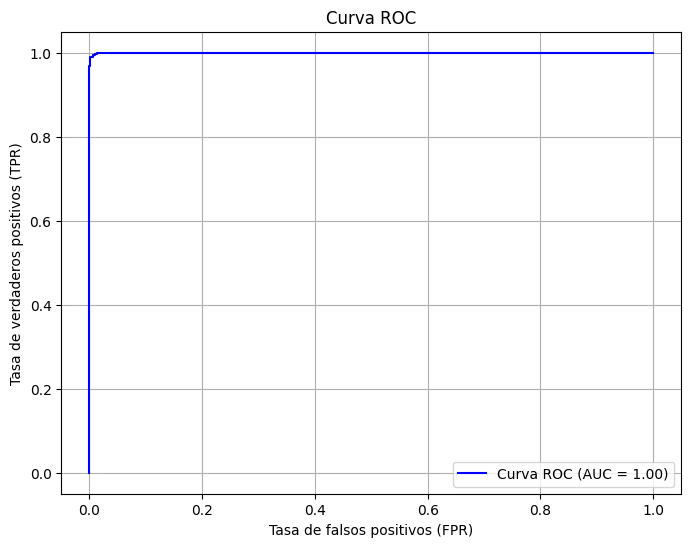


Valor de AUC: 1.00


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular la curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)

# Calcular AUC
auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc:.2f})')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Reportar el valor de AUC
print(f"\nValor de AUC: {auc:.2f}")

El valor de AUC es de **1**, que indica que el modelo es "perfecto"... pero también podría tener sobreajuste.

Se extraen los coeficientes del modelo de regresión logística, los cuales representan el impacto de cada una de las características en la predicción, y el valor del intercepto, que es el valor de la función logística cuando todas las características son cero.

In [32]:
# Obtener los coeficientes y el intercepto del modelo
coefficients = model.coef_[0]  # Los coeficientes de las características
intercept = model.intercept_[0]  # El valor del intercepto

# Mostrar los coeficientes junto con las características
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Mostrar el resumen de coeficientes
print("Coeficientes del modelo:")
print(coeff_df)

print("\nIntercepto del modelo:", intercept)

Coeficientes del modelo:
                        Feature  Coefficient
0                          Year     1.045363
1                   Engine_Size     3.540825
2                       Mileage    -0.000071
3                         Doors     0.036047
4                   Owner_Count    -0.013016
5                     Brand_BMW    -0.040656
6               Brand_Chevrolet     0.030986
7                    Brand_Ford    -0.017006
8                   Brand_Honda    -0.047122
9                 Brand_Hyundai     0.126483
10                    Brand_Kia     0.065876
11               Brand_Mercedes    -0.067068
12                 Brand_Toyota    -0.034568
13             Brand_Volkswagen     0.060170
14               Model_5 Series     0.106263
15                     Model_A3    -0.088758
16                     Model_A4     0.066941
17                 Model_Accord     0.104286
18                Model_C-Class     0.189782
19                   Model_CR-V    -0.076292
20                  Model_Camr

Los coeficientes del modelo indican cómo cada característica influye en la probabilidad de que un automóvil sea clasificado de manera positiva (por ejemplo, como un vehículo de más valor, con mayor demanda o de características especiales).

1. **Año**: Cada año extra en el vehículo aumenta considerablemente la probabilidad de que sea clasificado positivamente (coeficiente de 1.05). Cuanto más nuevo sea el coche, más probable es que esté en la clase positiva.

2. **Tamaño del motor**: Este tiene un impacto muy fuerte en la clasificación. Un motor más grande (coeficiente de 3.54) aumenta notablemente la probabilidad de una clasificación positiva.

3. **Kilometraje**: A pesar de que el coeficiente es pequeño (-0.000071), muestra que a medida que el kilometraje sube, la probabilidad de clasificación positiva disminuye ligeramente. Los autos con más kilómetros tienen menos probabilidades de ser considerados valiosos.

4. **Número de puertas**: Aunque el impacto es pequeño (coeficiente de 0.036), los autos con más puertas tienen ligeramente más probabilidades de ser clasificados positivamente.

5. **Marca**: Algunas marcas como **Hyundai** (coeficiente de 0.126) y **Kia** (coeficiente de 0.065) tienen más probabilidades de ser clasificadas positivamente en comparación con marcas como **BMW** (-0.041) y **Honda** (-0.047), que tienen coeficientes negativos, lo que significa que estos autos son menos probables de ser considerados de alta gama o con características especiales.

6. **Modelo**: Modelos específicos como el **Tucson** (coeficiente de 0.282) tienen una fuerte probabilidad de clasificación positiva, mientras que otros como el **Elantra** (-0.317) tienen menos probabilidades.

7. **Tipo de combustible**: Los autos eléctricos (**coeficiente de 6.95**) y los híbridos (**coeficiente de 3.22**) tienen una probabilidad mucho más alta de ser clasificados positivamente. Los autos de **gasolina** (-0.299), por el contrario, tienen una menor probabilidad de ser clasificados positivamente.

8. **Transmisión**: Los autos con **transmisión manual** (-5.22) o **semi-automática** (-5.03) tienen una probabilidad muy baja de ser clasificados positivamente. Esto probablemente refleja que estos tipos de transmisión están relacionados con autos de menor valor.

El **intercepto** (-2102.11) es simplemente el punto de referencia en el modelo, pero no tiene un impacto práctico directo.

Concluyendo: los autos con motor grande, eléctricos, más nuevos, y con ciertas marcas y modelos específicos tienen más probabilidades de ser clasificados positivamente. En cambio, los autos con más kilometraje, marcas específicas como **BMW** y **Honda**, y con transmisión manual tienen menos probabilidades.

*se usó chatgpt y gemini para ayudar en unas partes del código y corregir errores, al igual que las gráficas*